In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print(mnist)

<module 'keras.datasets.mnist' from '/Users/kalebhuneau/opt/anaconda3/lib/python3.8/site-packages/keras/datasets/mnist.py'>


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


5


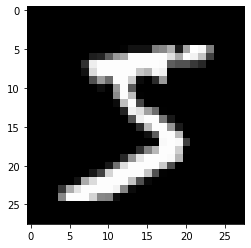

In [5]:
#what does each piece of data look like? 
plt.imshow(train_X[0], cmap = 'gist_gray')

#print "answer" for this piece
print(train_y[0])

X is used to denote the 28x28 matrix data that represents a handwritten digit
y is the correct "answer" for each corresponding X

train_X, and train_y will be used to train the model by giving the network the question(X) and solutions(y)

test_X, and test_y will be used to evalue the model

Text(0.5, 1.0, 'Original')

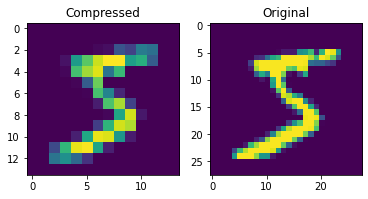

In [6]:
#reducing size:
def reduce(x):
    """
    Takes a 28 by 28 image and converts it to 14 by 14
    
    """
    avg = []
    for i in range(int(len(x)/2)):
        for j in range(int(len(x)/2)):
            avg.append((int(x[i*2][j*2]) + int(x[i*2][(j*2)+1]) + int(x[(i*2)+1][j*2]) + int(x[(i*2)+1][(j*2)+1])))
    return np.array(avg).reshape(14, 14)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reduce(train_X[0]))
ax1.set_title("Compressed")
ax2.imshow(train_X[0])
ax2.set_title("Original")

In [7]:
train_X = train_X/255
test_X = test_X/255

In [8]:
model = keras.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10)
])

In [9]:
model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
             metrics = ['accuracy'])




In [10]:
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2616 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1150 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0780 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0588 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0447 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0365 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [13]:
test_loss, test_acc = model.evaluate(test_X, test_y, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0772 - accuracy: 0.9790 - 311ms/epoch - 995us/step

Test accuracy: 0.9789999723434448


In [14]:
#for further predictions, convert output to a probability model 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probability_model.predict(test_X)

Model prediction for item 1 in the test_data: [7]


Actual Result:


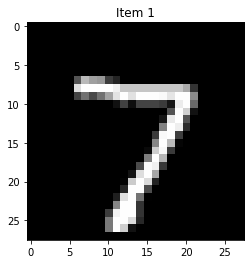

In [15]:
predicted = np.where(prediction[0] == max(prediction[0]))[0]
print("Model prediction for item 1 in the test_data: {}".format(predicted))


print("\n\nActual Result:")
plt.imshow(test_X[0], cmap = 'gist_gray')
plt.title("Item 1")
plt.show()

In [16]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#test out the model on the first 12 for predictions

predictions = probability_model.predict(test_X[:12])

In [17]:
print(type(train_X))

<class 'numpy.ndarray'>


### Try running a different network on the compressed data

In [18]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
reduced_train_X = np.array([reduce(i) for i in train_X])
reduced_test_X = np.array([reduce(i) for i in test_X])
#train_y and test_y stay the same

In [19]:
#now divide by 255*4 since the pixels were grouped into fours
reduced_train_X = reduced_train_X/(255*4)
reduced_test_X = reduced_test_X/(255*4)

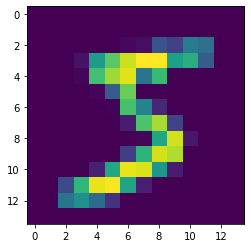

In [20]:
plt.imshow(reduced_train_X[0])

In [21]:
#build a new NN to classify digits
model = keras.Sequential([
    layers.Flatten(input_shape = (14, 14)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)
])


In [22]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [23]:
model.fit(reduced_train_X, train_y, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.3012 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 2s 915us/step - loss: 0.1281 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.0919 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.0733 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.0591 - accuracy: 0.9818


In [24]:
test_loss, test_acc = model.evaluate(reduced_test_X, test_y, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0701 - accuracy: 0.9792 - 379ms/epoch - 1ms/step

Test accuracy: 0.979200005531311
